<a href="https://www.kaggle.com/code/prasadposture121/financial-distress-prediction?scriptVersionId=117383621" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Financial Distress Prediction

## Importing Libraries

In [1]:
#ignoring warnings to keep the code clean
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


In [3]:
#importing dependencies
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Loading Data

In [5]:
import opendatasets as od
od.download('https://www.kaggle.com/c/GiveMeSomeCredit')

Skipping, found downloaded files in "./GiveMeSomeCredit" (use force=True to force download)


In [6]:
os.listdir('GiveMeSomeCredit')

['Data Dictionary.xls', 'cs-training.csv', 'sampleEntry.csv', 'cs-test.csv']

In [7]:
train_df = pd.read_csv('./GiveMeSomeCredit/cs-training.csv')
print(train_df.shape)
train_df.head()

(150000, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [8]:
test_df = pd.read_csv('./GiveMeSomeCredit/cs-test.csv')
print(test_df.shape)
test_df.head()

(101503, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [9]:
submission =  pd.read_csv('./GiveMeSomeCredit/sampleEntry.csv')
submission.head()

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264


In [10]:
train_df['SeriousDlqin2yrs'].unique()

array([1, 0])

Labels are in the form of binary numbers.

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

## Exploratory Data Analysis

### Stastical Information

In [13]:
train_df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [14]:
test_df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,50752.000000,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,29301.536524,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25376.500000,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,50752.000000,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,76127.500000,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,101503.000000,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


In [15]:
train_df['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

Observe that the number of `0's` are lot more than the `1's`, training with such distribution had lead me to lesser accuracy therefore, we will only take fraction of data whose label is `0` this time.

In [16]:
train0=train_df[train_df['SeriousDlqin2yrs']==0].sample(frac=0.30)
train1=train_df[train_df['SeriousDlqin2yrs']==1].copy()
train_df=pd.concat([train0, train1], axis=0)
train_df['SeriousDlqin2yrs'].value_counts()

0    41992
1    10026
Name: SeriousDlqin2yrs, dtype: int64

### Distribution of data

In [17]:
Atttributes= ['RevolvingUtilizationOfUnsecuredLines', 'age',
              'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
              'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
              'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
              'NumberOfDependents']

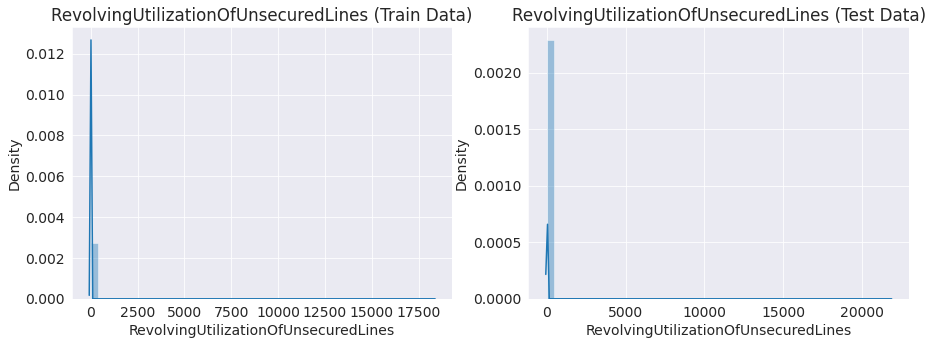

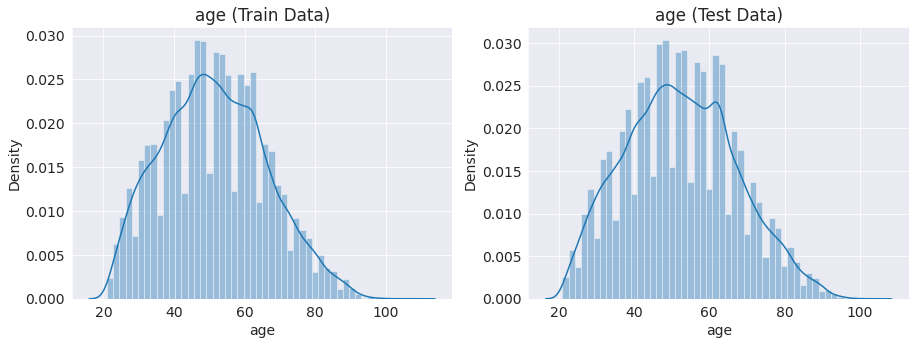

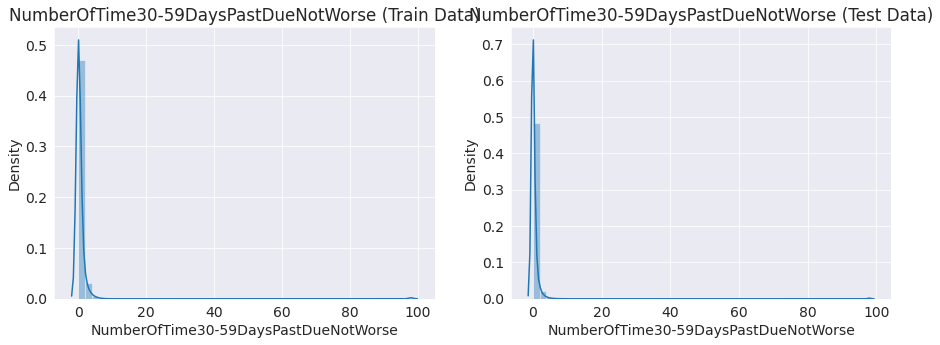

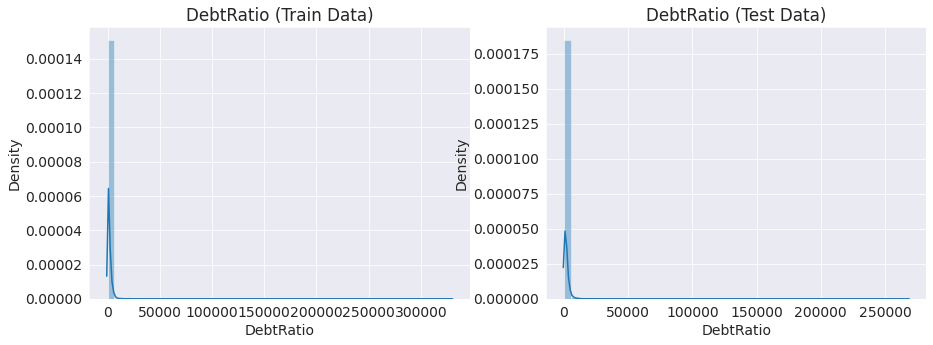

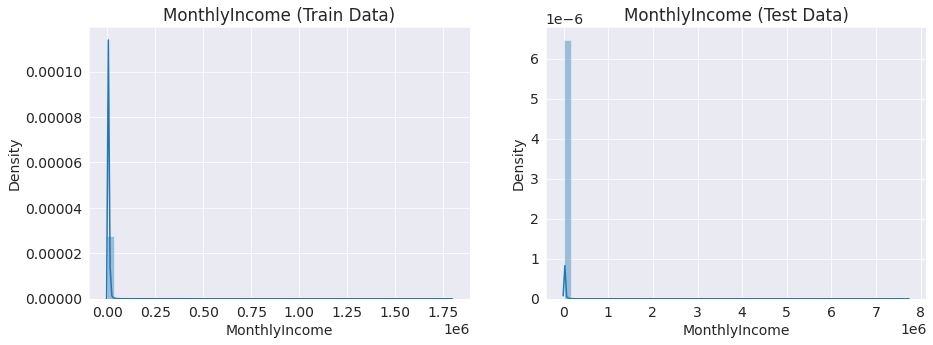

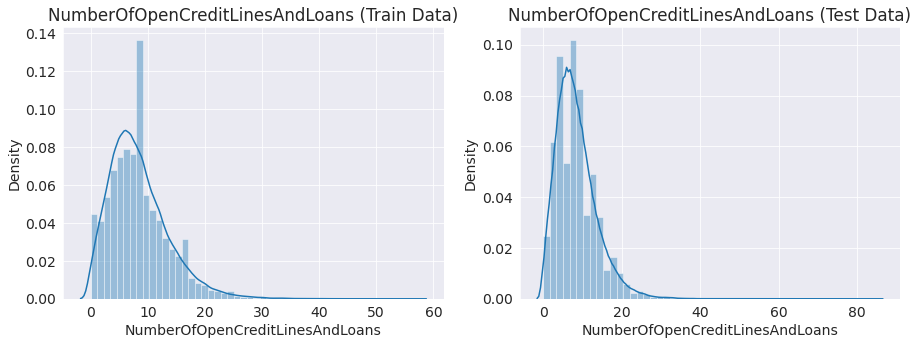

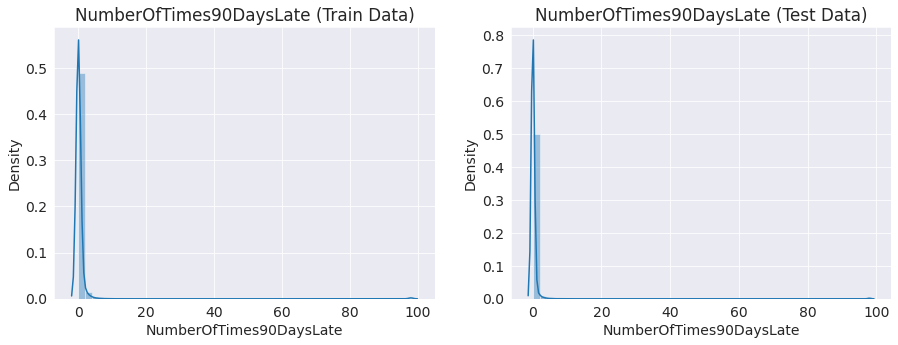

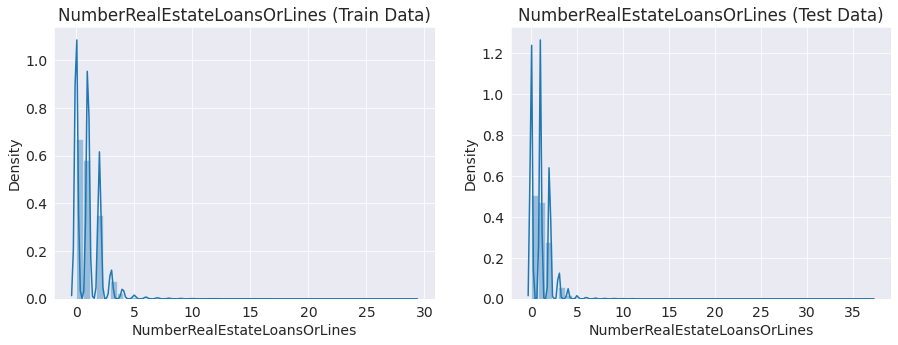

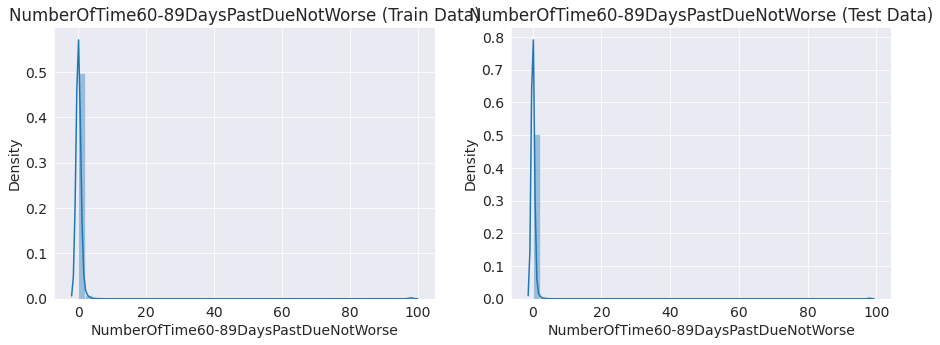

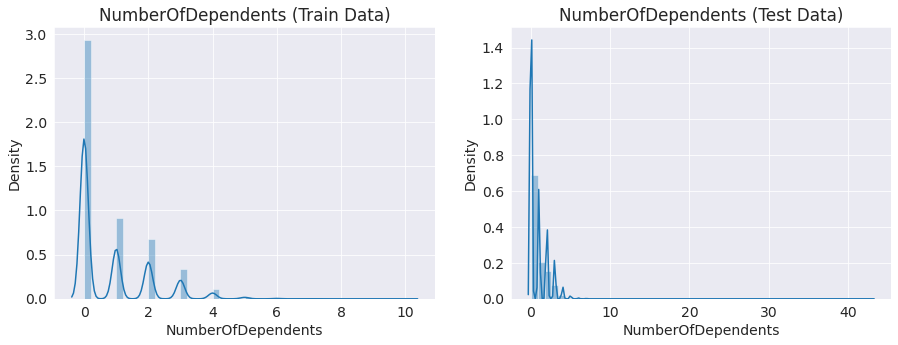

In [18]:
for i in Atttributes:
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    axes[0].set_title(i+' (Train Data)')
    sns.distplot(train_df[i], ax=axes[0])
    axes[1].set_title(i+' (Test Data)')
    sns.distplot(test_df[i], ax=axes[1])

There are lot of outliers in both datasets. We need to take care of them properly so that they don't trouble us after scaling the data. For that we will substitute the outliers with value which comes under two times stadard deviation. We choosing two times standard deviation since it covers 95% of the part of the distribution.

In [19]:
def normalizer(x,df):
    upper_boundary=df[x].mean()+2*df[x].std()
    lower_boundary=df[x].mean()-2*df[x].std()
    max_att=df[x].max()
    min_att=df[x].min()
    return {'Attribute':x, 'upper_boundary': upper_boundary, 'lower_boundary': lower_boundary, 
           'max_att':max_att, 'min_att':min_att }

In [20]:
train_limits = pd.DataFrame([normalizer(x, train_df) for x in Atttributes])
train_limits

,Attribute,upper_boundary,lower_boundary,max_att,min_att
0,RevolvingUtilizationOfUnsecuredLines,449.237495,-435.235162,18300.0,0.0
1,age,80.974285,22.022639,109.0,21.0
2,NumberOfTime30-59DaysPastDueNotWorse,12.167463,-10.823736,98.0,0.0
3,DebtRatio,5237.699254,-4528.121479,329664.0,0.0
4,MonthlyIncome,30551.991160,-17535.873510,1794060.0,0.0
5,NumberOfOpenCreditLinesAndLoans,18.790212,-2.046931,57.0,0.0
6,NumberOfTimes90DaysLate,11.967241,-10.971240,98.0,0.0
7,NumberRealEstateLoansOrLines,3.326181,-1.310225,29.0,0.0
8,NumberOfTime60-89DaysPastDueNotWorse,11.872438,-10.987821,98.0,0.0
9,NumberOfDependents,3.031121,-1.474680,10.0,0.0


In [21]:
test_limits = pd.DataFrame([normalizer(x, test_df) for x in Atttributes])
test_limits

,Attribute,upper_boundary,lower_boundary,max_att,min_att
0,RevolvingUtilizationOfUnsecuredLines,397.622078,-387.002077,21821.0,0.0
1,age,81.964949,22.845924,104.0,21.0
2,NumberOfTime30-59DaysPastDueNotWorse,9.530745,-8.623205,98.0,0.0
3,DebtRatio,3609.665483,-2920.715442,268326.0,0.0
4,MonthlyIncome,79872.236339,-66162.165160,7727000.0,0.0
5,NumberOfOpenCreditLinesAndLoans,18.741714,-1.834687,85.0,0.0
6,NumberOfTimes90DaysLate,9.328408,-8.735026,98.0,0.0
7,NumberRealEstateLoansOrLines,3.233580,-1.207433,37.0,0.0
8,NumberOfTime60-89DaysPastDueNotWorse,9.277472,-8.736838,98.0,0.0
9,NumberOfDependents,3.042603,-1.504510,43.0,0.0


In [22]:
def NormAtt(i, lim_df, df):
    Att=lim_df.iloc[i].Attribute
    UL=lim_df.iloc[i].upper_boundary
    LL=lim_df.iloc[i].lower_boundary
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    axes[0].set_title('Old Distribution of '+Att)
    sns.distplot(df[Att], ax=axes[0])
    df.loc[df[Att]<LL,Att]=LL
    df.loc[df[Att]>UL,Att]=UL
    axes[1].set_title('New Distribution of '+Att)
    sns.distplot(df[Att], ax=axes[1])

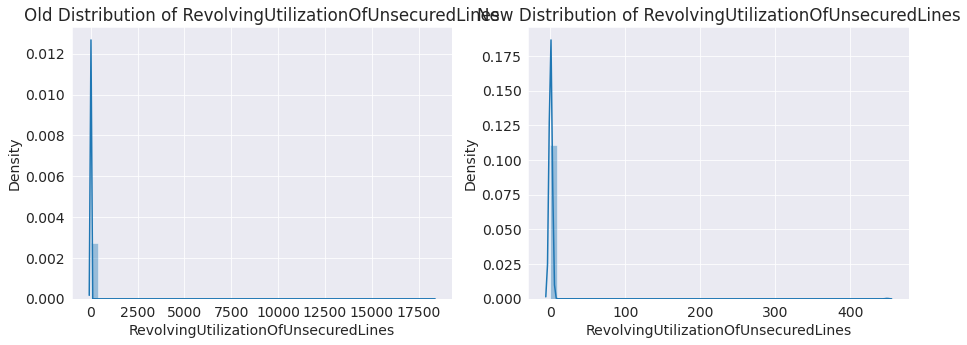

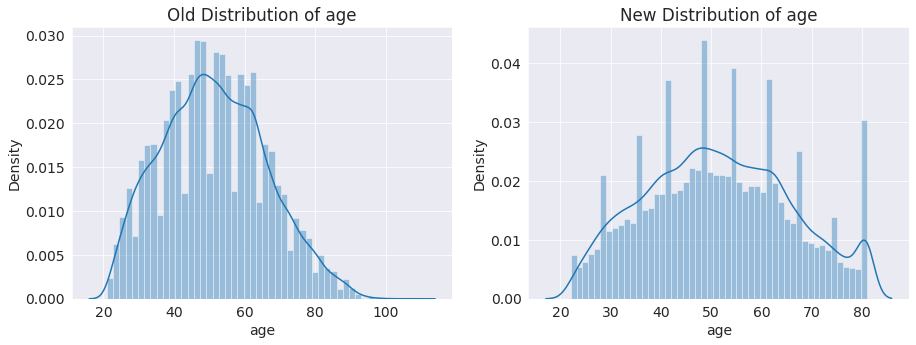

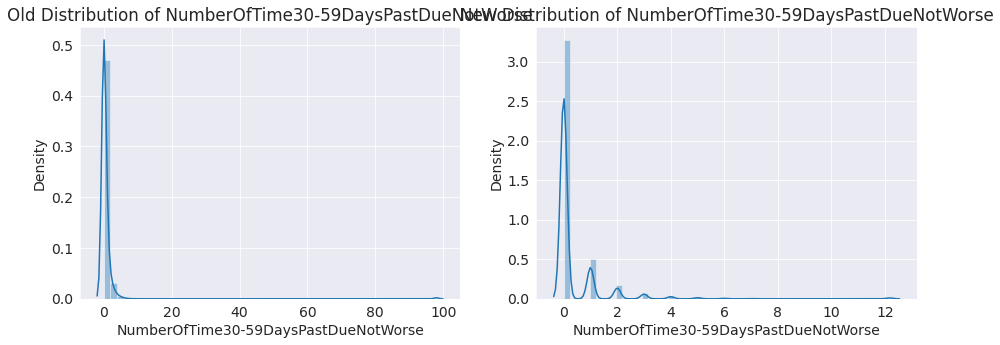

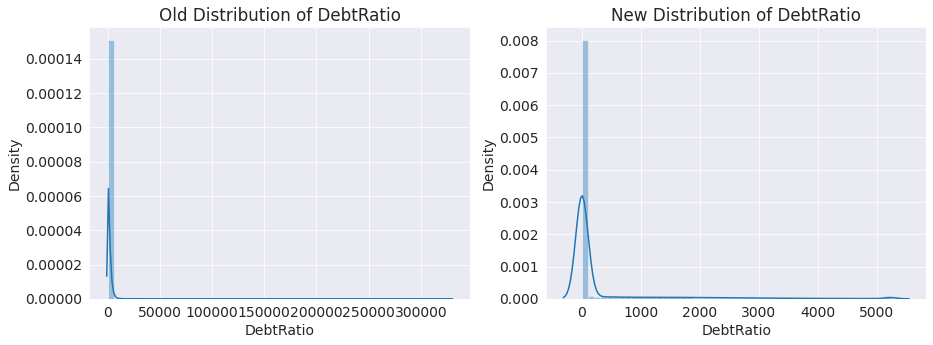

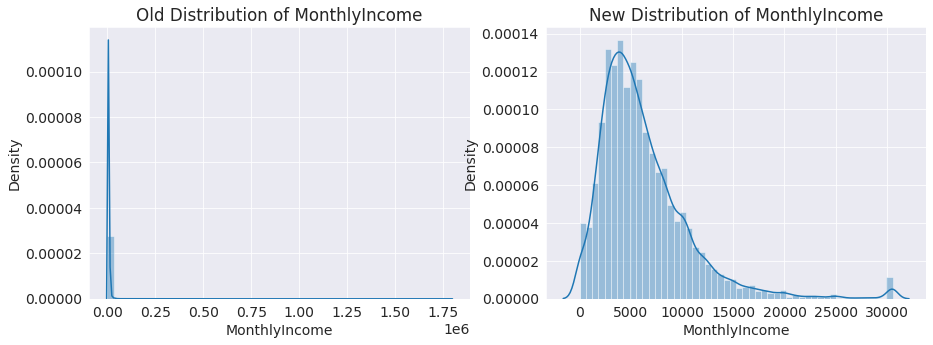

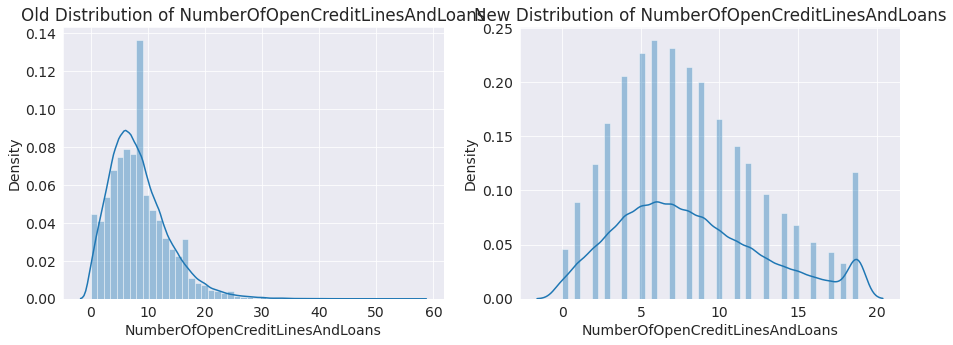

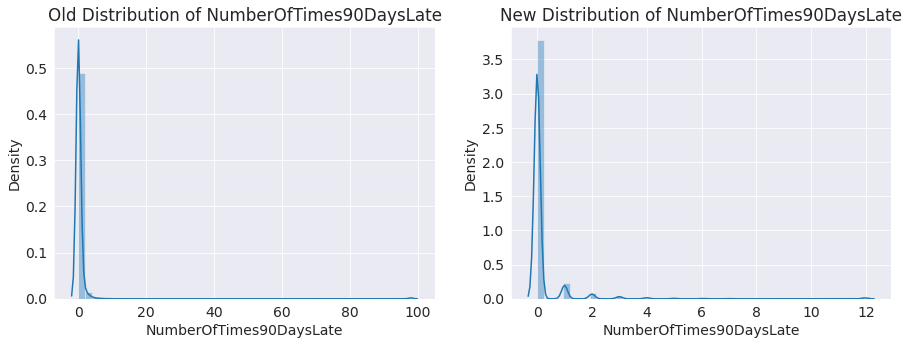

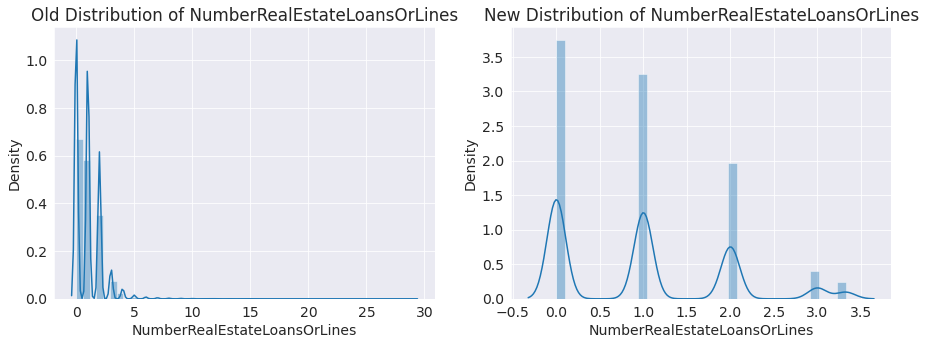

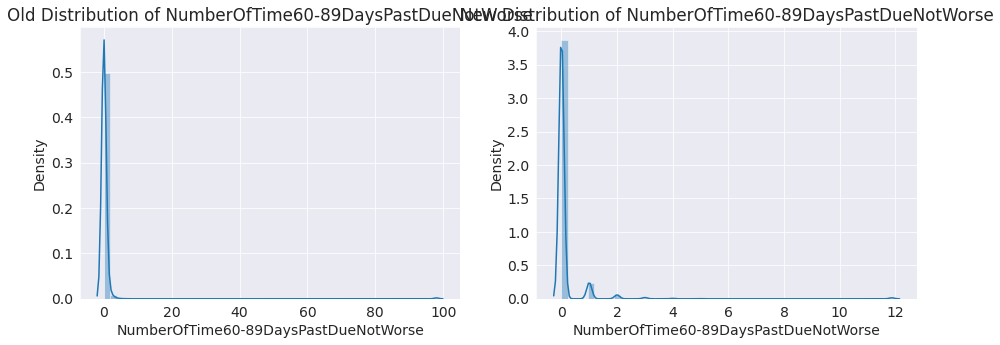

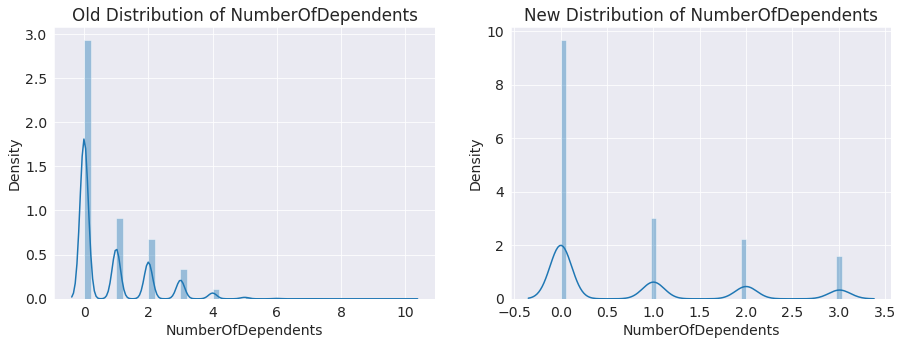

In [23]:
for i in range(0,10):
    NormAtt(i, train_limits, train_df)

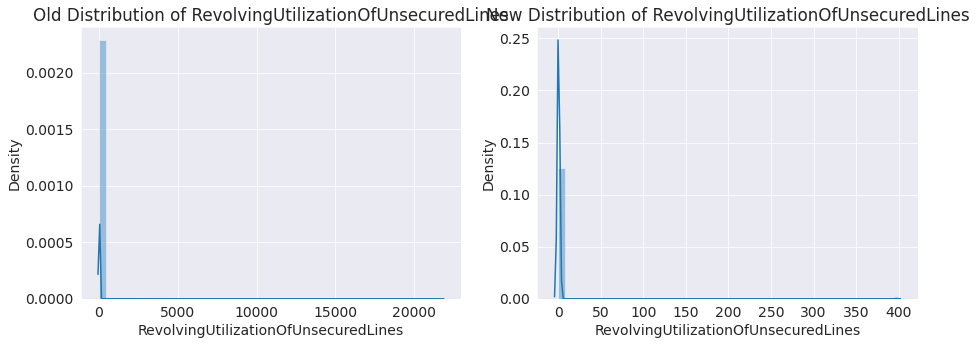

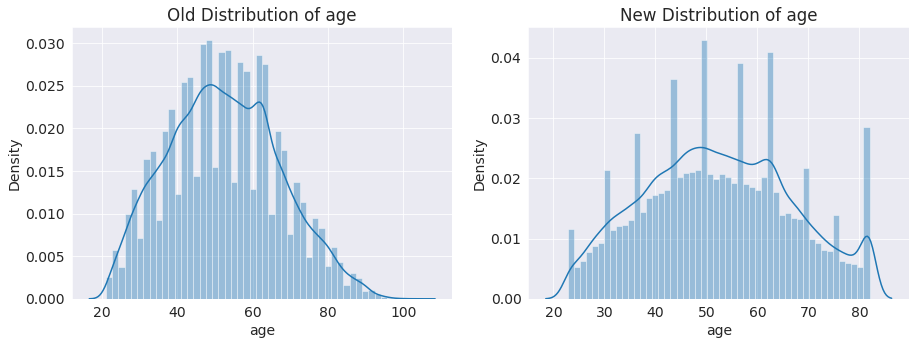

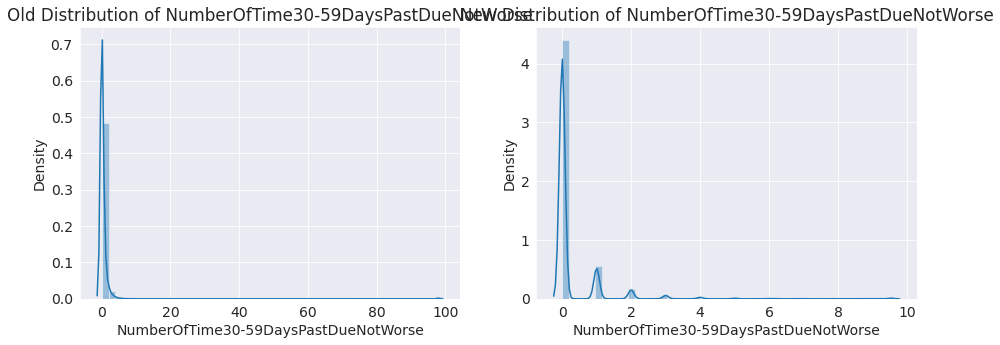

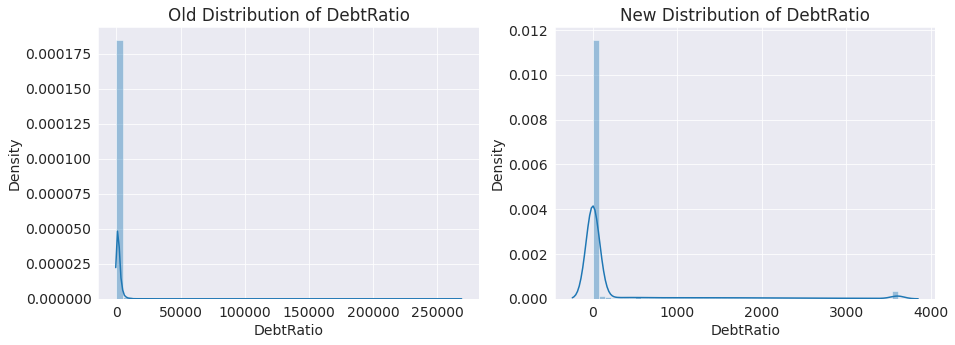

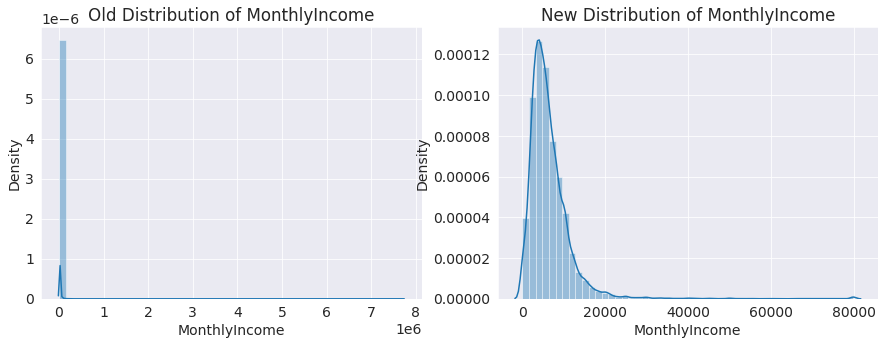

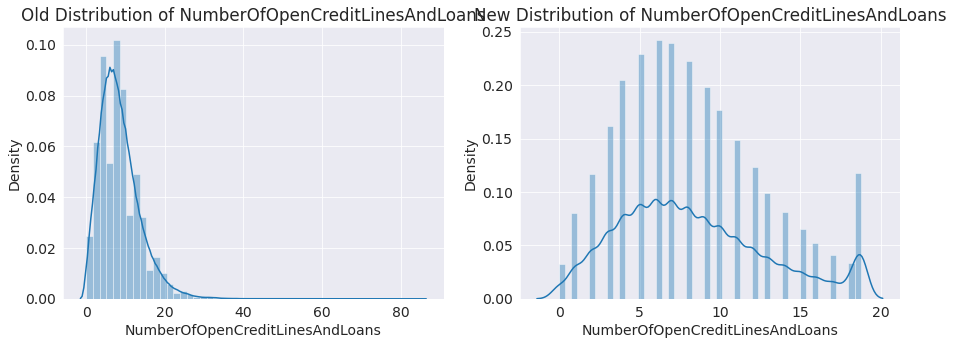

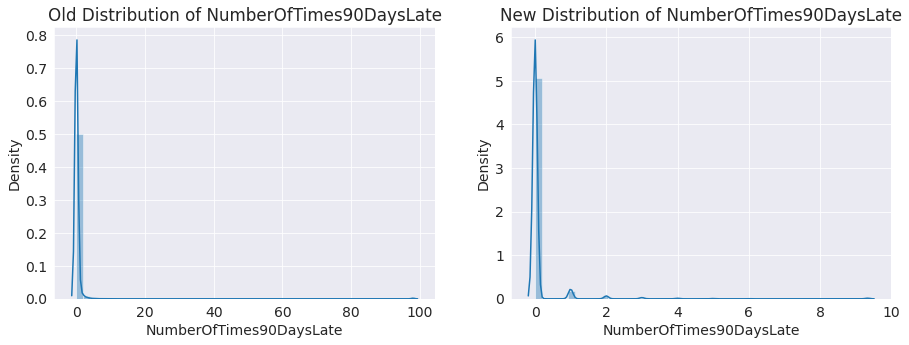

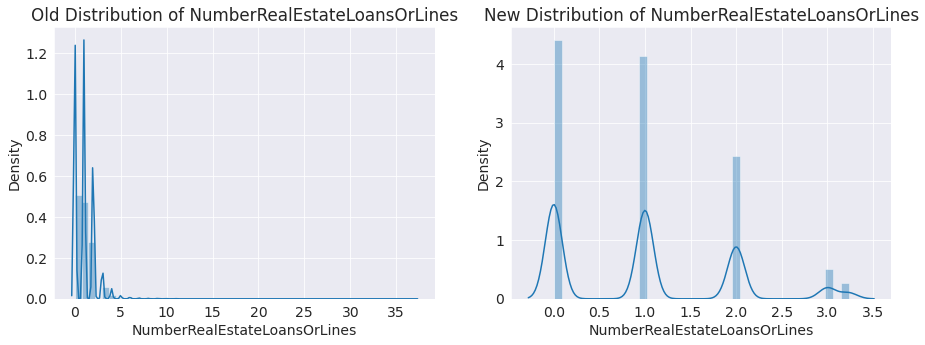

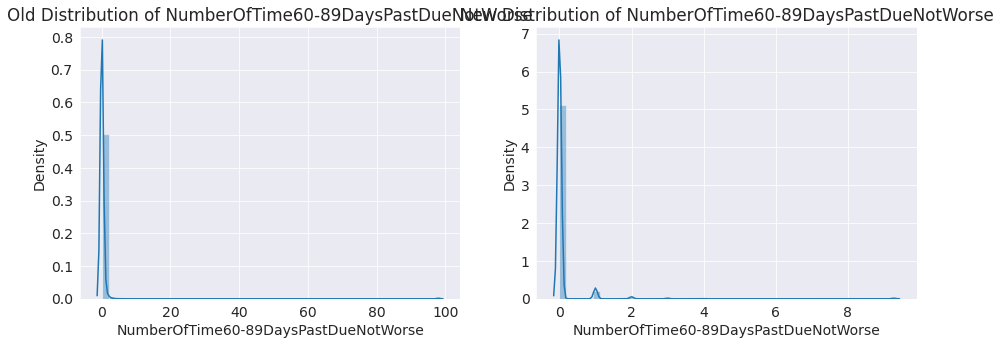

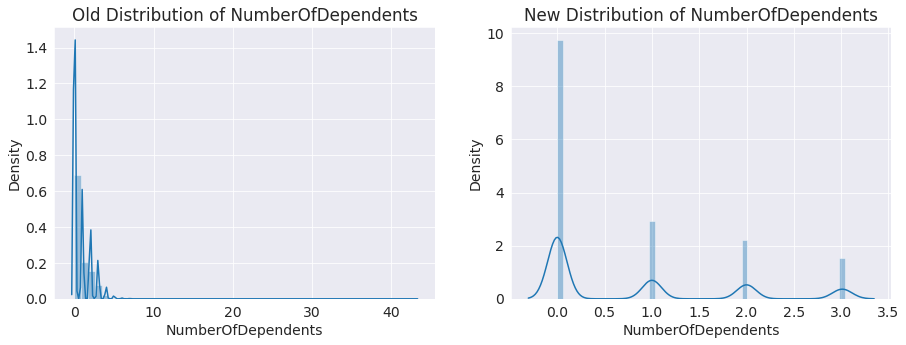

In [24]:
for i in range(0,10):
    NormAtt(i, test_limits, test_df)

#### Correlation

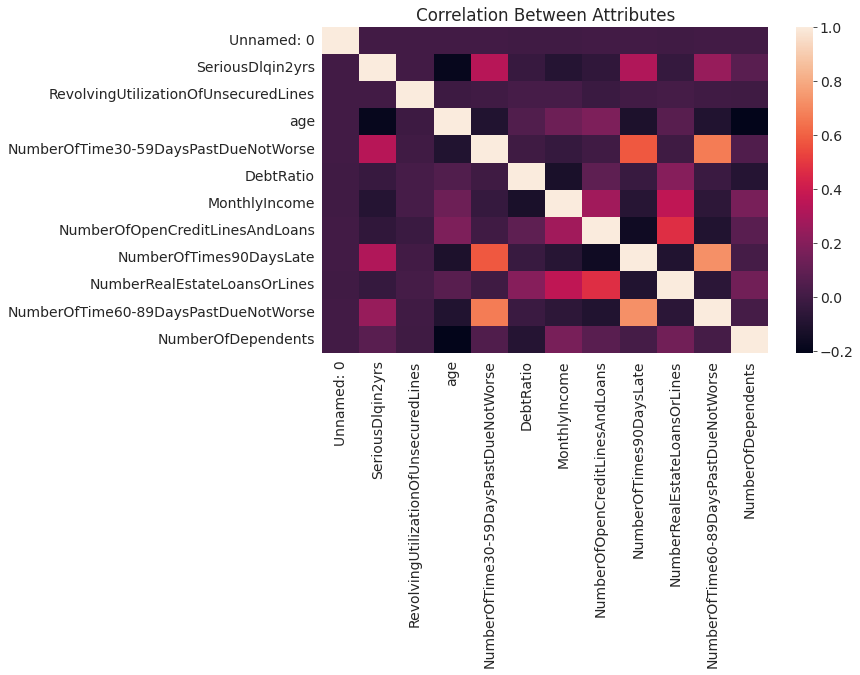

In [25]:
sns.heatmap(train_df.corr())
plt.title('Correlation Between Attributes');

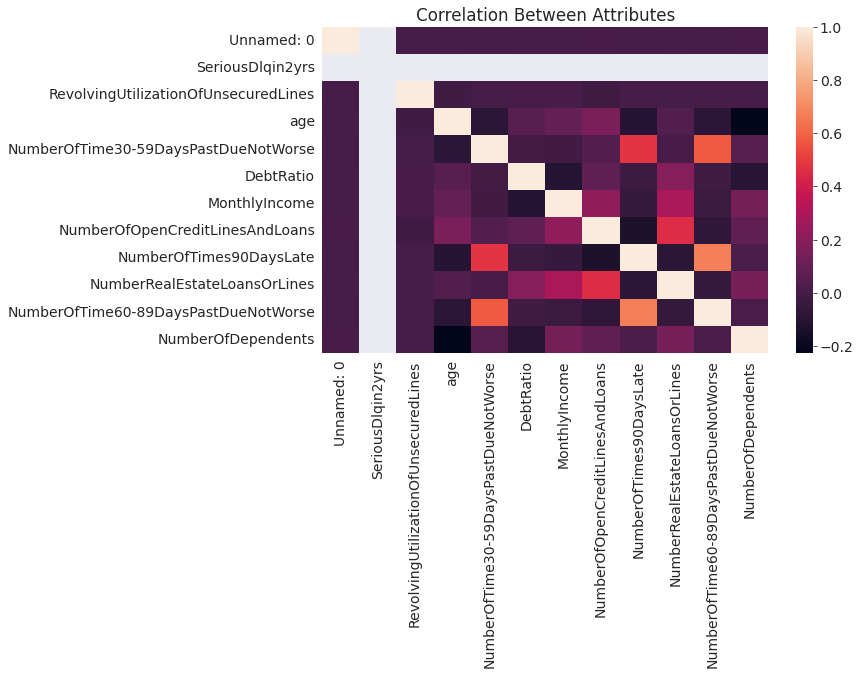

In [26]:
sns.heatmap(test_df.corr())
plt.title('Correlation Between Attributes');

### Input and Target Columns

In [27]:
train_df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [28]:
input_cols = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']
target_col = 'SeriousDlqin2yrs'

In [29]:
inputs = train_df[input_cols].copy()
targets = train_df[target_col].copy()

In [30]:
test_inputs = test_df[input_cols].copy()

### Imputing missing numeric values

In [31]:
from sklearn.impute import SimpleImputer

In [32]:
imputer = SimpleImputer(strategy = 'median').fit(train_df[input_cols])

In [33]:
inputs[input_cols] = imputer.transform(inputs[input_cols])
test_inputs[input_cols] = imputer.transform(test_inputs[input_cols])

In [34]:
inputs[input_cols].isna().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [35]:
test_inputs[input_cols].isna().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### Scaling Numeric Features

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler().fit(train_df[input_cols])

In [38]:
inputs[input_cols] = scaler.transform(inputs[input_cols])
test_inputs[input_cols] = scaler.transform(test_inputs[input_cols])

In [39]:
inputs.describe().loc[['min', 'max']]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [40]:
test_inputs.describe().loc[['min', 'max']]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
min,0.000000,0.013965,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,0.885104,1.016805,0.783298,0.68917,2.614305,0.997419,0.779495,0.97216,0.781429,1.003788


In [41]:
inputs.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
57534,0.000003,0.254062,0.000000,1.526777e-07,0.081828,0.319315,0.000000,0.000000,0.0,0.000000
19841,0.000503,0.729027,0.000000,5.320037e-05,0.248756,0.585411,0.000000,0.601290,0.0,0.329911
117625,0.000332,0.983473,0.000000,7.425191e-05,0.089683,0.904726,0.000000,0.000000,0.0,0.000000
114870,0.001692,0.508508,0.082186,5.964269e-05,0.242734,0.478973,0.083561,0.300645,0.0,0.329911
90300,0.000474,0.152283,0.000000,7.504747e-05,0.181494,0.425754,0.000000,0.300645,0.0,0.329911


In [42]:
test_inputs.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.001971,0.355840,0.000000,0.000034,0.186567,0.212877,0.0,0.000000,0.0,0.000000
1,0.001031,0.593323,0.000000,0.000101,0.299195,0.798288,0.0,0.972160,0.0,0.659822
2,0.000096,0.627249,0.000000,0.000131,0.166372,0.638630,0.0,0.300645,0.0,0.659822
3,0.000624,0.271025,0.082186,0.000177,0.104739,0.372534,0.0,0.601290,0.0,0.000000
4,0.002226,0.084431,0.000000,0.000004,0.126506,0.212877,0.0,0.000000,0.0,0.329911


### Modeling : DecisionTreeClassifier

#### Splitting

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_val, train_targets, val_targets = train_test_split(inputs, targets, test_size=0.25)

#### Training

We can use `DecisionTreeClassifier` from `sklearn.tree` to train a decision tree.

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
model = DecisionTreeClassifier(random_state=42)

In [46]:
#fitting the model
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

#### Evaluation

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [48]:
train_preds = model.predict(X_train)

In [49]:
train_preds

array([0, 0, 1, ..., 0, 0, 0])

In [50]:
pd.value_counts(train_preds)

0    31472
1     7541
dtype: int64

In [51]:
#Probabilities for each prediction
train_probs = model.predict_proba(X_train)

In [52]:
train_probs

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [53]:
accuracy_score(train_targets, train_preds)

0.9995129828518698

The training set accuracy is close to 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too.We can make predictions and compute accuracy in one step using `model.score`

In [54]:
model.score(X_val, val_targets)

0.7908496732026143

It appears that the model has learned the training examples perfect, and doesn't generalize well to previously unseen examples. This phenomenon is called "overfitting", and reducing overfitting is one of the most important parts of any machine learning project.

In [55]:
val_targets.value_counts() / len(val_targets)

0    0.809765
1    0.190235
Name: SeriousDlqin2yrs, dtype: float64

Although the training accuracy is 100%, the accuracy on the validation set is just about 79%, which is not even better than always predicting `0`. 

In [56]:
base_acc = accuracy_score(train_targets, train_preds), model.score(X_val, val_targets)
base_acc

(0.9995129828518698, 0.7908496732026143)

#### Visualization of Decision Tree

In [57]:
from sklearn.tree import plot_tree, export_text

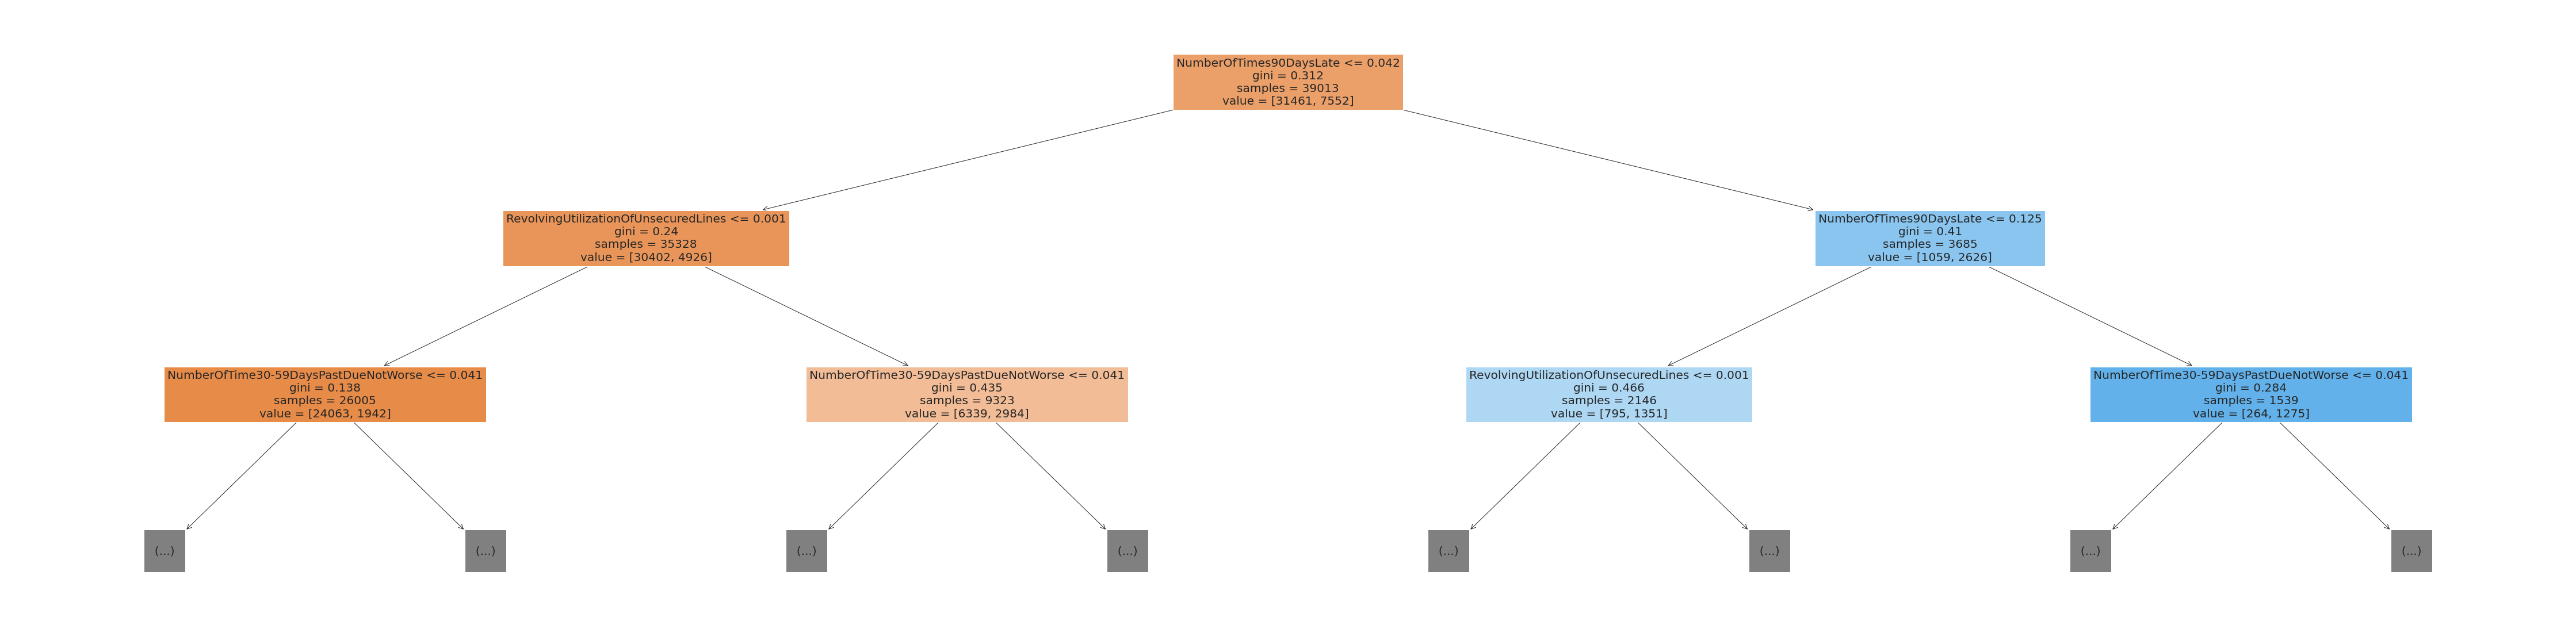

In [58]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [59]:
model.tree_.max_depth

42

In [60]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- NumberOfTimes90DaysLate <= 0.04
|   |--- RevolvingUtilizationOfUnsecuredLines <= 0.00
|   |   |--- NumberOfTime30-59DaysPastDueNotWorse <= 0.04
|   |   |   |--- NumberOfTime60-89DaysPastDueNotWorse <= 0.04
|   |   |   |   |--- RevolvingUtilizationOfUnsecuredLines <= 0.00
|   |   |   |   |   |--- NumberRealEstateLoansOrLines <= 0.95
|   |   |   |   |   |   |--- age <= 0.55
|   |   |   |   |   |   |   |--- NumberOfOpenCreditLinesAndLoans <= 0.56
|   |   |   |   |   |   |   |   |--- MonthlyIncome <= 0.13
|   |   |   |   |   |   |   |   |   |--- MonthlyIncome <= 0.13
|   |   |   |   |   |   |   |   |   |   |--- NumberRealEstateLoansOrLines <= 0.75
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 24
|   |   |   |   |   |   |   |   |   |   |--- NumberRealEstateLoansOrLines >  0.75
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- MonthlyIncome >  0.13
|   |   |   |   |   |   |   |   |   |   |--

#### Feature Importance

In [61]:
model.feature_importances_

array([0.21531712, 0.11168448, 0.05223735, 0.15005449, 0.12858212,
       0.06863802, 0.18820523, 0.02760931, 0.02427442, 0.03339746])

In [62]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [63]:
importance_df.head(10)

,feature,importance
0,RevolvingUtilizationOfUnsecuredLines,0.215317
6,NumberOfTimes90DaysLate,0.188205
3,DebtRatio,0.150054
4,MonthlyIncome,0.128582
1,age,0.111684
5,NumberOfOpenCreditLinesAndLoans,0.068638
2,NumberOfTime30-59DaysPastDueNotWorse,0.052237
9,NumberOfDependents,0.033397
7,NumberRealEstateLoansOrLines,0.027609
8,NumberOfTime60-89DaysPastDueNotWorse,0.024274


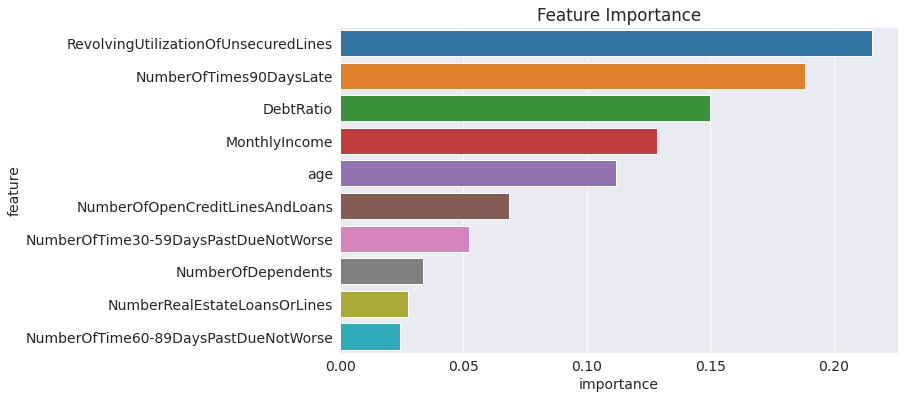

In [64]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

#### Hyperparameter Tuning
We will define a function that will check the accuracy with different parameters and their various values over a range. Also plotting the graph of relation between the accuracy and parameter values.

In [65]:
def test_params(**params):
    model = DecisionTreeClassifier(random_state=42, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
def test_param_and_plot(param_name, param_values):
    train_acc, val_acc = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_score, val_score = test_params(**params)
        train_acc.append(train_score)
        val_acc.append(val_score)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_acc)
    plt.plot(param_values, val_acc)
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])
    print('Max Acc by:', val_acc.index(max(val_acc))+ int(min(param_values)))

#### `criterion`

In [66]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.7908496732026143)


(0.9995129828518698, 0.7971549404075355)

In [67]:
model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.7908496732026143)


(0.9995129828518698, 0.7908496732026143)

`criterion='entropy'` increases the accuracy

#### `splitter`

In [68]:
model = DecisionTreeClassifier(criterion='entropy', splitter='random', random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.7908496732026143)


(0.9995129828518698, 0.7887735486351404)

In [69]:
model = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.7908496732026143)


(0.9995129828518698, 0.7971549404075355)

though `splitter='best'` gives more accuracy than the `splitter='random'` but it is same as before cause it is a default arguement

#### `max_depth`

Max Acc by: 5


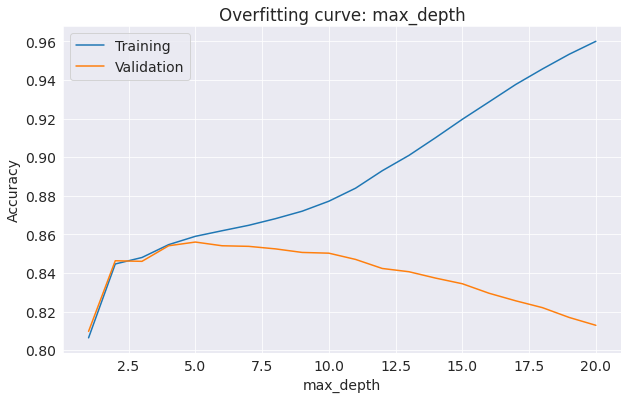

In [70]:
def test_params(**params):
    model = DecisionTreeClassifier(random_state=42,criterion='entropy', **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
max_depth=[i for i in range(1,21)]
test_param_and_plot('max_depth',max_depth)

In [71]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.7908496732026143)


(0.8590213518570733, 0.8560553633217993)

#### `max_leaf_nodes`

Max Acc by: 26


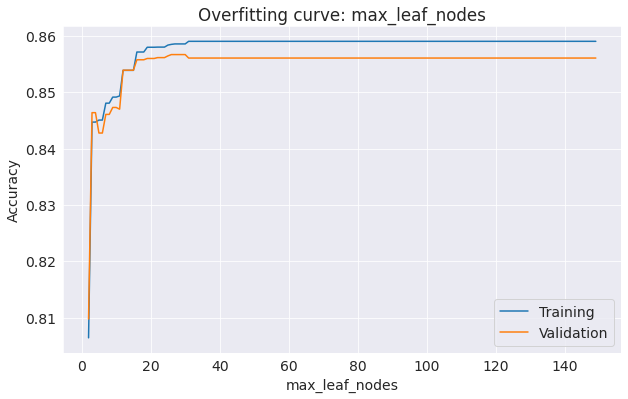

In [72]:
def test_params(**params):
    model = DecisionTreeClassifier(random_state=42,criterion='entropy', max_depth=5, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
max_leaf_nodes=[i for i in range(2,150)]
test_param_and_plot('max_leaf_nodes',max_leaf_nodes)

In [76]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=26,
                               random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.7908496732026143)


(0.8584830697459821, 0.8566705113417916)

#### `min_samples_split`

Max Acc by: 2


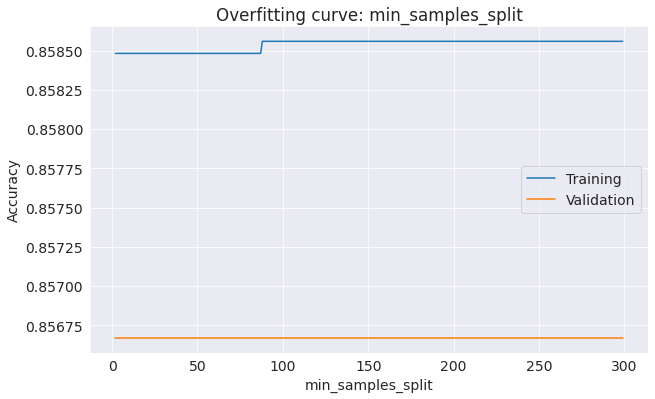

In [77]:
def test_params(**params):
    model = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=26,
                                   random_state=42, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
min_samples_split=[i for i in range(2,300)]
test_param_and_plot('min_samples_split',min_samples_split)

In [78]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=26,
                               min_samples_split=2, random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.7908496732026143)


(0.8584830697459821, 0.8566705113417916)

#### `min_samples_leaf`

Max Acc by: 1


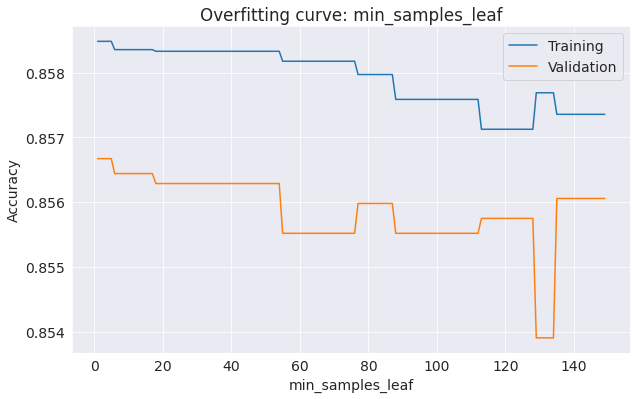

In [79]:
def test_params(**params):
    model = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=26,
                                   min_samples_split=2, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
min_samples_leaf=[i for i in range(1,150)]
test_param_and_plot('min_samples_leaf',min_samples_leaf)

In [80]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5,
                               max_leaf_nodes=26, min_samples_split=2,
                               min_samples_leaf=1, random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.7908496732026143)


(0.8584830697459821, 0.8566705113417916)

#### `max_features`

Max Acc by: 10


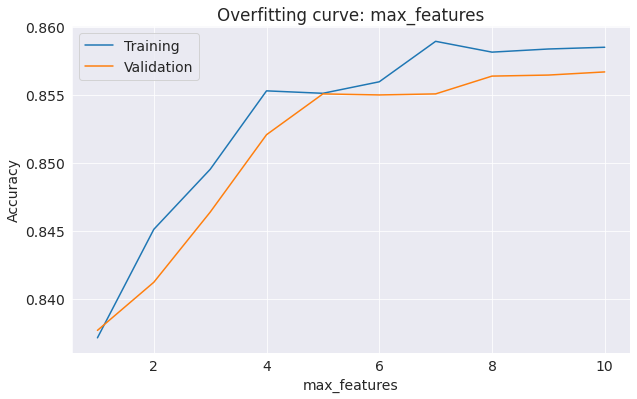

In [81]:
def test_params(**params):
    model = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=26,
                                   min_samples_split=2,min_samples_leaf=1, 
                                   random_state=42, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
max_features=[i for i in range(1,11)]
test_param_and_plot('max_features',max_features)

In [82]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=26,
                               min_samples_split=2,min_samples_leaf=1,
                               max_features=10, random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.7908496732026143)


(0.8584830697459821, 0.8566705113417916)

#### `min_impurity_decrease`

Max Acc by: 0


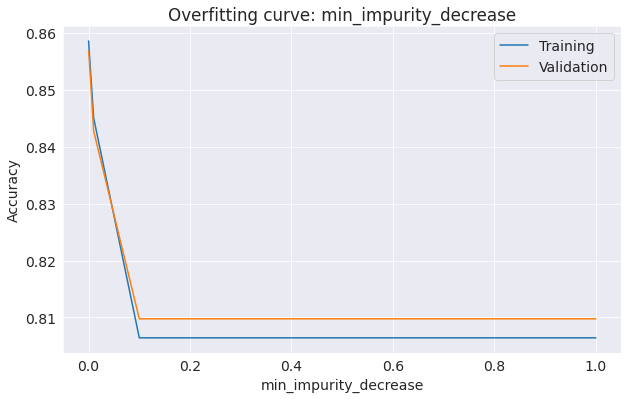

In [84]:
def test_params(**params):
    model = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=26, 
                                   min_samples_split=2,min_samples_leaf=1,
                                   max_features=10, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
min_impurity_decrease=[1.0e-10,0, 1.0e-9, 1.0e-7, 1.0e-5, 1.0e-4, 1.0e-3, 1.0e-2, 1.0e-1, 1.0]
test_param_and_plot('min_impurity_decrease',min_impurity_decrease)

In [85]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=26, 
                               min_samples_split=2,min_samples_leaf=1,
                               max_features=10, random_state=42,
                               min_impurity_decrease=0.0)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.7908496732026143)


(0.8584830697459821, 0.8566705113417916)

#### `class_weight`

In [88]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=26,
                               min_samples_split=2,min_samples_leaf=1,
                               max_features=10, random_state=42,
                               min_impurity_decrease=0.0,class_weight={0:15.5, 1:1})
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.7908496732026143)


(0.8084740983774639, 0.8112264513648597)

In [89]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=26,
                               min_samples_split=2,min_samples_leaf=1,
                               max_features=10, random_state=42,
                               min_impurity_decrease=0.0,class_weight={0:1.5, 1:1})
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.7908496732026143)


(0.8575603004126829, 0.8552095347943098)

In [90]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=26,
                               min_samples_split=2,min_samples_leaf=1,
                               max_features=10, random_state=42,
                               min_impurity_decrease=0.0,class_weight={0:5, 1:1})
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.7908496732026143)


(0.8250583138953682, 0.8277585544021531)

In [91]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=26,
                               min_samples_split=2,min_samples_leaf=1,
                               max_features=10, random_state=42,
                               min_impurity_decrease=0.0,class_weight={0:1, 1:0})
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.7908496732026143)


(0.8064234998590214, 0.8097654748173779)

In [92]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=26,
                               min_samples_split=2,min_samples_leaf=1,
                               max_features=10, random_state=42,
                               min_impurity_decrease=0.0,class_weight={0:1, 1:0.5})
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.7908496732026143)


(0.8484351370056135, 0.8478277585544022)

None of the combination of weights are seem to be working here

### Predictions with Best Parameter Values

In [93]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=26,
                               min_samples_split=2,min_samples_leaf=1,
                               max_features=10, random_state=42,
                               min_impurity_decrease=0.0)
model.fit(X_train, train_targets)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.8584830697459821, 0.8566705113417916)

In [94]:
test_preds=model.predict(test_inputs)
test_preds

array([0, 0, 0, ..., 0, 0, 0])

In [112]:
pd.value_counts(test_preds) / len(test_preds)

0    0.915195
1    0.084805
dtype: float64

In [113]:
submission['Probability']=test_preds
submission.head()

,Id,Probability
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [95]:
#Saving Submissions as CSV File
submission.to_csv('submission.csv', index=None)

It gives the accuracy of 72.20% which is good but we will have to try different algorithm.

### Modeling : RandomForestClassifier

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [98]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [99]:
model.score(X_train, train_targets)

0.9995129828518698

In [100]:
model.score(X_val, val_targets)

0.8523644752018454

Accuracy on validation data without hyper parameter tuning is significantly more than that of the untuned DecisionTreeClassifier. Since RandomForestClassifier uses multiple decision trees (n_estimators=100 by default) to make predictions and gives the prediction which the average of all the predictions given by each tree. We can see that none of the tree has accuracy higher than the decision tree.

In [101]:
len(model.estimators_)

100

In [102]:
def estimator_acc(i):
    model.estimators_[i].fit(X_train, train_targets)
    return model.estimators_[i].score(X_val, val_targets)

In [103]:
accuracy=[]
for i in range(0,100):
    accuracy.append(estimator_acc(i))

In [104]:
max(accuracy)

0.7988465974625144

See here the maximum accuracy of individual tree is `80%`  where as accuracy of RandomForest is `85.55%`

In [105]:
train_probs = model.predict_proba(X_train)
train_probs

array([[1.        , 0.        ],
       [0.99879464, 0.00120536],
       [0.        , 1.        ],
       ...,
       [0.99879464, 0.00120536],
       [1.        , 0.        ],
       [1.        , 0.        ]])

#### Feature Importance

In [106]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [107]:
importance_df.head(10)

,feature,importance
0,RevolvingUtilizationOfUnsecuredLines,0.222003
3,DebtRatio,0.146068
4,MonthlyIncome,0.125884
6,NumberOfTimes90DaysLate,0.121136
1,age,0.117155
5,NumberOfOpenCreditLinesAndLoans,0.078169
2,NumberOfTime30-59DaysPastDueNotWorse,0.074506
8,NumberOfTime60-89DaysPastDueNotWorse,0.049034
9,NumberOfDependents,0.036365
7,NumberRealEstateLoansOrLines,0.029679


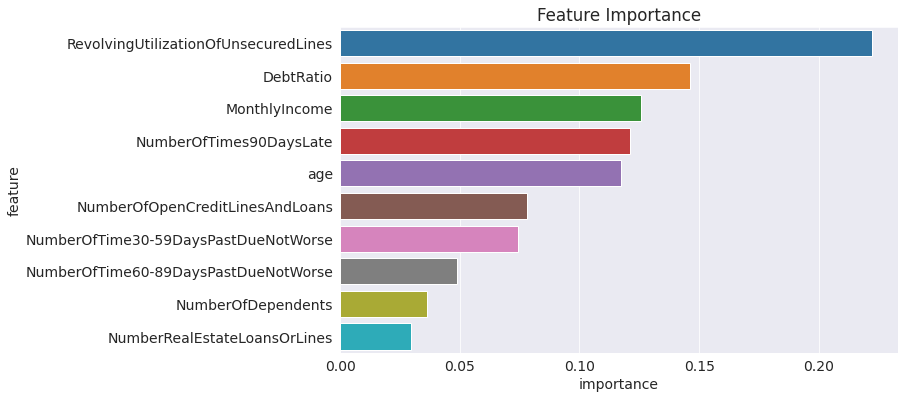

In [108]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

#### Hyperparameter Tuning
We will define a function that will check the accuracy with different parameters and their various values over a range. Also plotting the graph of relation between the accuracy and parameter values.

In [109]:
def test_params(**params):
    model = RandomForestClassifier(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
def test_param_and_plot(param_name, param_values):
    train_acc, val_acc = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_score, val_score = test_params(**params)
        train_acc.append(train_score)
        val_acc.append(val_score)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_acc)
    plt.plot(param_values, val_acc)
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])
    print('Max Acc by:', val_acc.index(max(val_acc))+ int(min(param_values)))

In [110]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets)
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)
base_accs = base_train_acc, base_val_acc
base_accs

(0.9995129828518698, 0.8523644752018454)

#### `n_estimator`

Max Acc by: 104


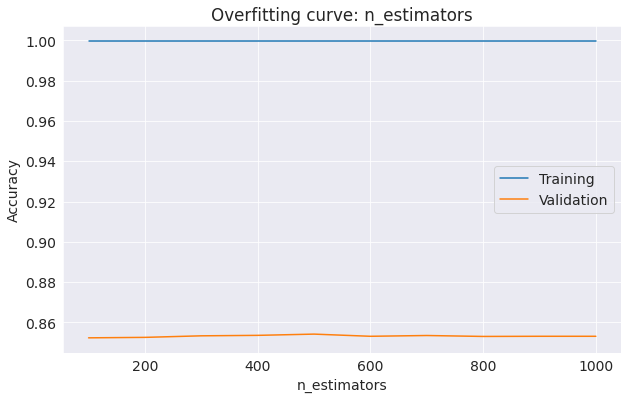

In [117]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
n_estimators=[100, 200, 300, 400, 500,600, 700, 800, 900, 1000]
test_param_and_plot('n_estimators',n_estimators)

In [118]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500)
model.fit(X_train, train_targets)
print(base_accs)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.8523644752018454)


(0.9995129828518698, 0.8542099192618223)

#### `max_depth`

Max Acc by: 7


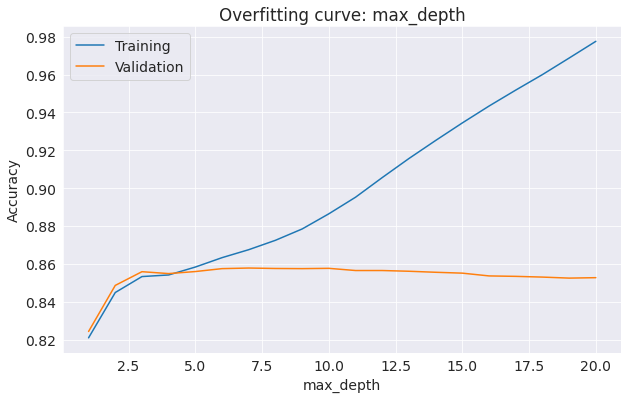

In [119]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1,n_estimators=500, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
max_depth=[i for i in range(1,21)]
test_param_and_plot('max_depth',max_depth)

In [123]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500, max_depth=7)
model.fit(X_train, train_targets)
print(base_accs)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.8523644752018454)


(0.8676594981160126, 0.8579777008842753)

#### `max_leaf_nodes`

Max Acc by: 110


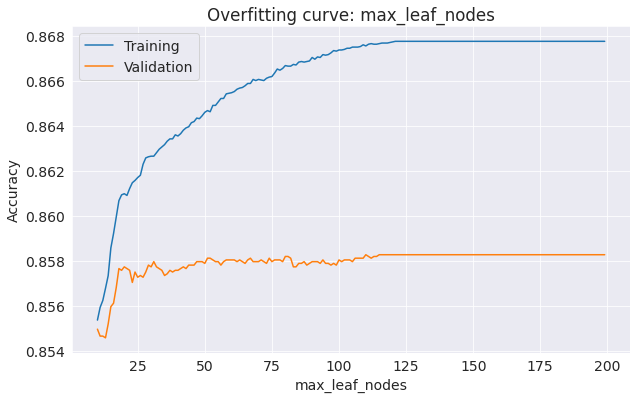

In [124]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1,
                                   n_estimators=500, max_depth=7, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
max_leaf_nodes=[i for i in range(10,200)]
test_param_and_plot('max_leaf_nodes',max_leaf_nodes)

In [128]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,
                               n_estimators=500, max_depth=7,
                              max_leaf_nodes=110)
model.fit(X_train, train_targets)
print(base_accs)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.8523644752018454)


(0.8675569681900904, 0.8582852748942714)

#### `max_features`

Max Acc by: 3


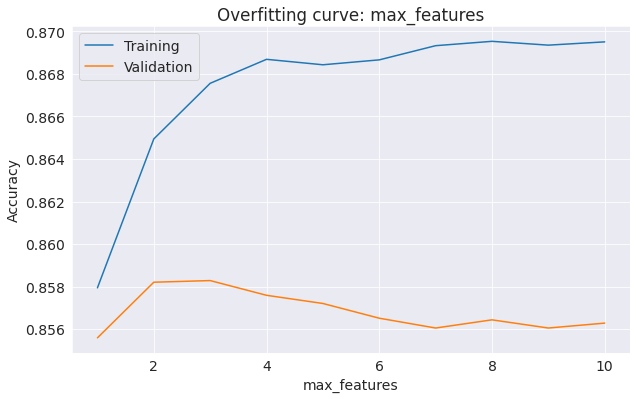

In [129]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1,
                                   n_estimators=500, max_depth=7,
                                   max_leaf_nodes=110, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
max_features=[i for i in range(1,11)]
test_param_and_plot('max_features',max_features)

In [130]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,
                               n_estimators=500, max_depth=7,
                              max_leaf_nodes=110, max_features=3)
model.fit(X_train, train_targets)
print(base_accs)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.8523644752018454)


(0.8675569681900904, 0.8582852748942714)

#### `min_samples_split`

Max Acc by: 16


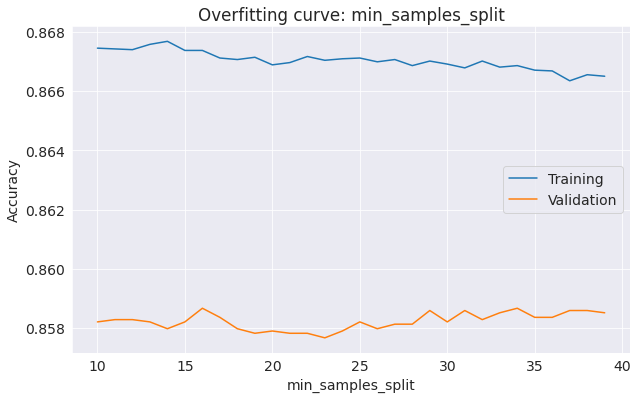

In [131]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1,
                                   n_estimators=500, max_depth=7,
                                   max_leaf_nodes=110, max_features=3,
                                   **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
min_samples_split=[i for i in range(10,40)]
test_param_and_plot('min_samples_split',min_samples_split)

In [132]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,
                                   n_estimators=500, max_depth=7,
                                   max_leaf_nodes=110, max_features=3,
                                   min_samples_split=16)
model.fit(X_train, train_targets)
print(base_accs)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.8523644752018454)


(0.8673775408197267, 0.8586697424067666)

#### `min_samples_leaf`

Max Acc by: 1


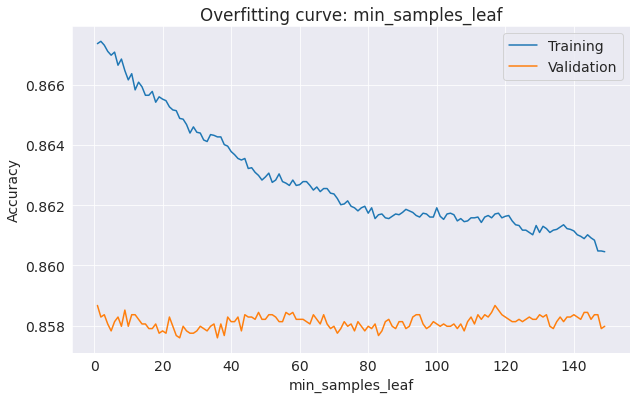

In [133]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1,
                                   n_estimators=500, max_depth=7,
                                   max_leaf_nodes=110, max_features=3,
                                   min_samples_split=16,**params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
min_samples_leaf=[i for i in range(1,150)]
test_param_and_plot('min_samples_leaf',min_samples_leaf)

In [134]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,
                                   n_estimators=500, max_depth=7,
                                   max_leaf_nodes=110, max_features=3,
                                   min_samples_split=16,min_samples_leaf=1)
model.fit(X_train, train_targets)
print(base_accs)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.8523644752018454)


(0.8673775408197267, 0.8586697424067666)

#### `min_impurity_decrease`

Max Acc by: 0


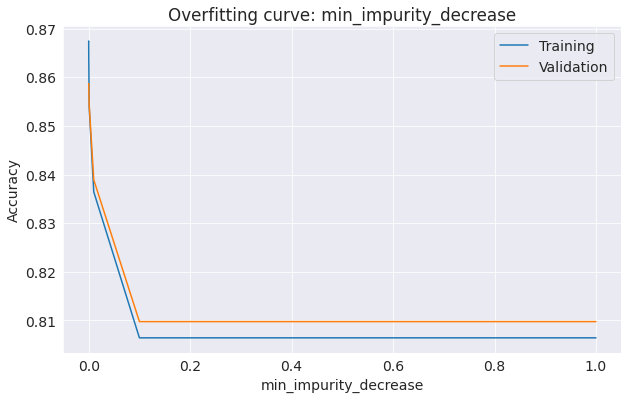

In [135]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1,
                                   n_estimators=500, max_depth=7,
                                   max_leaf_nodes=110, max_features=3,
                                   min_samples_split=16,min_samples_leaf=1,
                                   **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
min_impurity_decrease=[1.0e-10,0, 1.0e-9, 1.0e-7, 1.0e-5, 1.0e-4, 1.0e-3, 1.0e-2, 1.0e-1, 1.0]
test_param_and_plot('min_impurity_decrease',min_impurity_decrease)

In [136]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,
                               n_estimators=500, max_depth=7,
                               max_leaf_nodes=110, max_features=3,
                               min_samples_split=16,min_samples_leaf=1,
                               min_impurity_decrease=0.0)
model.fit(X_train, train_targets)
print(base_accs)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.8523644752018454)


(0.8673775408197267, 0.8586697424067666)

#### `bootstrap` 
No need to change the default boolean value which is `True`, since model performs better with bootstrap enabled.

#### `class_weight`

In [138]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,
                               n_estimators=500, max_depth=7,
                               max_leaf_nodes=110, max_features=3,
                               min_samples_split=16,min_samples_leaf=1,
                               min_impurity_decrease=0.0, class_weight={0:4, 1:1})
model.fit(X_train, train_targets)
print(base_accs)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.8523644752018454)


(0.8360546484505165, 0.8362168396770473)

In [139]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,
                               n_estimators=500, max_depth=7,
                               max_leaf_nodes=110, max_features=3,
                               min_samples_split=16,min_samples_leaf=1,
                               min_impurity_decrease=0.0, class_weight={0:1.5, 1:1})
model.fit(X_train, train_targets)
print(base_accs)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.8523644752018454)


(0.8618152923384513, 0.8557477893118032)

In [140]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,
                               n_estimators=500, max_depth=7,
                               max_leaf_nodes=110, max_features=3,
                               min_samples_split=16,min_samples_leaf=1,
                               min_impurity_decrease=0.0, class_weight={0:1, 1:0})
model.fit(X_train, train_targets)
print(base_accs)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.8523644752018454)


(0.8064234998590214, 0.8097654748173779)

None of the combination of weights are seem to be working here

### Predictions with Best Parameter Values

In [146]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,
                               n_estimators=500, max_depth=7,
                               max_leaf_nodes=110, max_features=3,
                               min_samples_split=16,min_samples_leaf=1,
                               min_impurity_decrease=0.0)
model.fit(X_train, train_targets)
print(base_accs)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995129828518698, 0.8523644752018454)


(0.8673775408197267, 0.8586697424067666)

In [147]:
test_preds=model.predict(test_inputs)
test_preds

array([0, 0, 0, ..., 0, 0, 0])

In [148]:
pd.value_counts(test_preds) / len(test_preds)

0    0.928386
1    0.071614
dtype: float64

In [149]:
submission['Probability']=test_preds
submission.head()

,Id,Probability
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [145]:
#Saving the submissions
submission.to_csv('submission1.csv', index=None)

It gives the accuracy of 70.51% which is lesser than what DecisionTreeClassifier's output had given. The reason behind this could be maximum portion of the data is labeled as `0` if we had same number of `0` and `1` as training data's labels RandomForestClassifier would have performed better than the DecisionTreeClassifier.

### Saving the Model

In [150]:
import joblib

In [151]:
financial_distress = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'input_cols': input_cols,
    'target_col': target_col
}

In [152]:
joblib.dump(financial_distress, 'financial_distress')

['financial_distress']

In [153]:
financial_distress2 = joblib.load('financial_distress')

In [156]:
val_preds2 = financial_distress2['model'].predict(X_val)
accuracy_score(val_targets, val_preds2)

0.8586697424067666

We can use this saved model anywhere we want.

##### The End